# SET UP

In [1]:
import pandas as pd
import seaborn as sns
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
from scipy.stats import iqr
import umap
import functions

In [2]:
ct_to_col = {
    'post_CD8_act': '#ff7f0e', 
    'post_CD8_ex': '#d62728', 
    'post_CD8_mem': '#8c564b',
    'post_CD8_Naive': '#1f77b4', 
    'post_CD8_eff': '#2ca02c',  
    'post_CD8_ex_act': '#9467bd'
}

# DATA PREPARATION

## MODELS SIMULATION RESULTS

,biomass_maintenance,objective_value,percent_ov
scc_su010_post_GAGGTGATCACTTACT,180.855824,96559.370179,34.903097
scc_su010_post_GTATTCTGTCCGAAGA,173.032183,132548.390236,47.911966
scc_su010_post_AGCAGCCTCTCGCATC,144.897815,38149.439591,13.789791
scc_su011_post_GAATAAGAGGCAGTCA,177.475081,51490.715075,18.612232
scc_su010_post_CTAGAGTTCGTTGACA,177.319351,57707.261592,20.859313
...,...,...,...
scc_su010_post_cd39_TTGCCGTTCCCGGATG,113.150946,114309.727708,41.319278
scc_su010_post_cd39_GACCTGGGTCGACTAT,192.226349,119260.498378,43.108822
scc_su011_post_CTACACCCAAGTACCT,177.169533,55336.485836,20.002354
scc_su011_post_CGGACACCATAGACTC,181.531725,98575.666002,35.631923


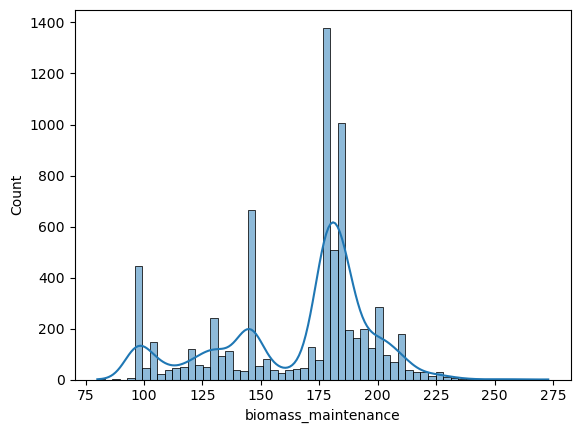

In [3]:
r_models = pd.read_csv("/Users/claudiavicentecomorera/Desktop/TFG/Results/TITC_post/pfba_rmodels_post.csv", index_col = 0)
sns.histplot(r_models, x = "biomass_maintenance", bins = 60, kde = True)
r_models

## FLUXOMES DATAFRAME

In [4]:
fluxes_df = pd.read_csv("/Users/claudiavicentecomorera/Desktop/TFG/Results/TITC_post/pfba_fluxes_post.csv", index_col = 0)
fluxes_df = fluxes_df.fillna(0.0)
fluxes_df

,10FTHFtm,2DR1PP,2HBO,2HBt2,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,34DHPLACOX,...,EX_gua[e],GPDDA1,ACNAMtn,PALFATPtc,C05769te,r2352,RE1100C,EX_HC02187[e],EX_tym[e],TYMte
scc_su010_post_GAGGTGATCACTTACT,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su010_post_GTATTCTGTCCGAAGA,-3.359995e-14,0.0,2.769697e+02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su010_post_AGCAGCCTCTCGCATC,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su011_post_GAATAAGAGGCAGTCA,0.000000e+00,0.0,3.365371e-30,3.365371e-30,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su010_post_CTAGAGTTCGTTGACA,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scc_su010_post_cd39_TTGCCGTTCCCGGATG,1.150826e-14,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su010_post_cd39_GACCTGGGTCGACTAT,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su011_post_CTACACCCAAGTACCT,0.000000e+00,0.0,-4.516520e-31,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scc_su011_post_CGGACACCATAGACTC,0.000000e+00,0.0,1.000000e+03,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## FLUXES TRANSFORMATION

In [5]:
t_fluxes_df = fluxes_df.applymap(functions.flux_transformer)

## REACTIONS FILTERING

In [6]:
rx = pd.DataFrame(columns=['Reaction', 'IQR'])
for col in t_fluxes_df.columns:
    IQR = iqr(t_fluxes_df[col])
    if IQR != 0:
        rx = pd.concat([rx, pd.DataFrame({'Reaction': [col], 'IQR': [IQR]})], ignore_index = True)

ft_fluxes_df = t_fluxes_df[rx['Reaction']]
rx

,Reaction,IQR
0,ACACT1rm,7.753084
1,ACACT1x,8.380822
2,ACACt2m,6.842569
3,ACCOACm,5.644534
4,ALCD21_L,7.447033
...,...,...
279,CYTDt,2.810725
280,GLNyLATthc,6.742716
281,EX_asn_L[e],4.854067
282,sink_phe_L[c],5.563194


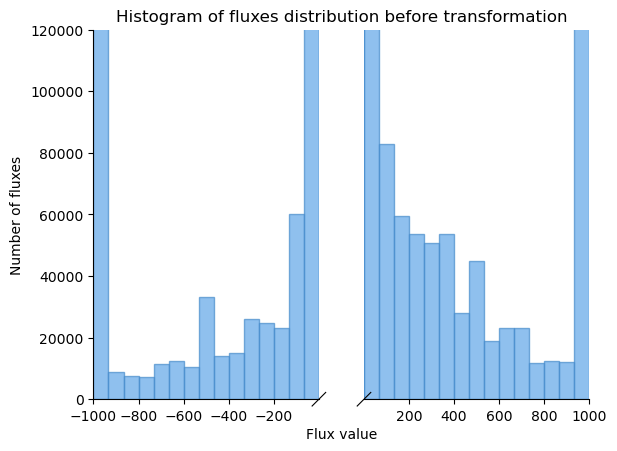

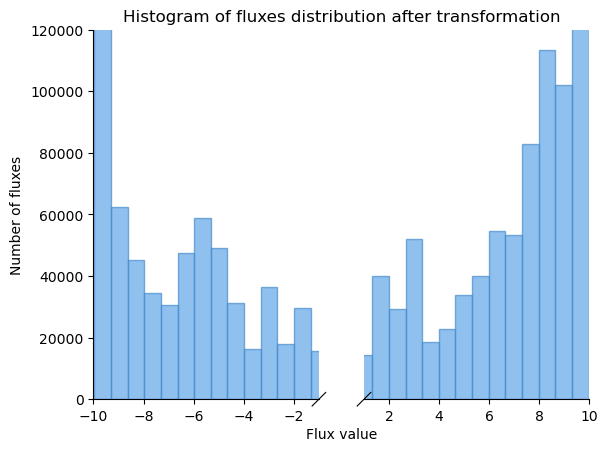

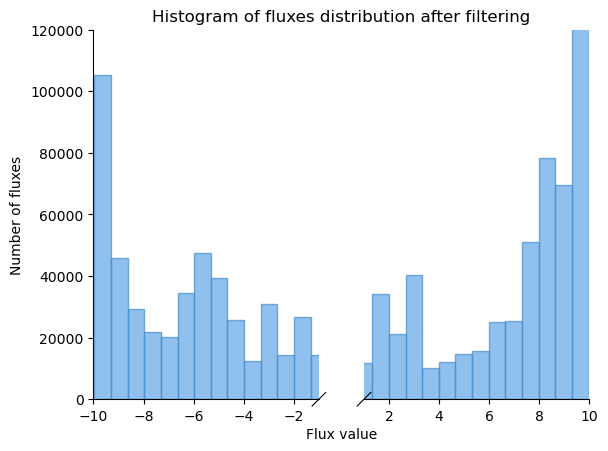

In [7]:
f_array = fluxes_df.values.flatten()
bax = brokenaxes(xlims=((-1000, -1), (1, 1000)))
bax.hist(f_array[~((f_array > -1) & (f_array < 1))], bins = 30, alpha = .7, color = '#60A6E7', edgecolor = '#468BCB')
plt.title("Histogram of fluxes distribution before transformation")
plt.ylabel('Number of fluxes', labelpad = 50)
plt.xlabel('Flux value', labelpad = 20)
bax.set_ylim(0, 120000) 
plt.show()

ft_array = t_fluxes_df.values.flatten()
bax = brokenaxes(xlims=((-10, -1), (1, 10)))
bax.hist(ft_array[~((ft_array > -1) & (ft_array < 1))], bins = 30, alpha = .7, color = '#60A6E7', edgecolor = '#468BCB')
plt.title("Histogram of fluxes distribution after transformation")
plt.ylabel('Number of fluxes', labelpad = 50)
plt.xlabel('Flux value', labelpad = 20)
bax.set_ylim(0, 120000) 
plt.show()

fft_array = ft_fluxes_df.values.flatten()
bax = brokenaxes(xlims=((-10, -1), (1, 10)))
bax.hist(fft_array[~((fft_array > -1) & (fft_array < 1))], bins = 30, alpha = .7, color = '#60A6E7', edgecolor = '#468BCB')
plt.title("Histogram of fluxes distribution after filtering")
plt.ylabel('Number of fluxes', labelpad = 50)
plt.xlabel('Flux value', labelpad = 20)
bax.set_ylim(0, 120000) 
plt.show()

# RESULTS VISUALIZATION

## COLOR MAPPING

In [8]:
c_labs = pd.read_csv('/Users/claudiavicentecomorera/Desktop/TFG/Data/TITC/post_CD8/clabs_titc.csv')
c_labs['Cell_Name'] = c_labs['Cell_Name'].str.replace('.', '_')
d_clabs = {type: group['Cell_Name'].tolist() for type, group in c_labs.groupby('Cluster_Label')}     
colors = [next((ct_to_col[type] for type, cells in d_clabs.items() if cell in cells)) for cell in fluxes_df.index]

In [9]:
c_labs

,Cell_Name,Cluster_Label
0,scc_su010_post_cd39_AAACCTGCAGCTCGCA,post_CD8_ex
1,scc_su010_post_cd39_AAACCTGCAGTAACGG,post_CD8_mem
2,scc_su010_post_cd39_AAACCTGGTCAGATAA,post_CD8_ex
3,scc_su010_post_cd39_AAACCTGGTCTGCAAT,post_CD8_mem
4,scc_su010_post_cd39_AAACGGGCACAGACAG,post_CD8_ex
...,...,...
7115,scc_su014_post_TTAGTTCAGCACCGCT,post_CD8_mem
7116,scc_su014_post_TTCGAAGCACCAGGCT,post_CD8_eff
7117,scc_su014_post_TTCTCAAAGGCGATAC,post_CD8_mem
7118,scc_su014_post_TTTACTGGTGTGACGA,post_CD8_eff


In [10]:
l = []
l_labs = []

for key, value in d_clabs.items():
    l.append(plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = ct_to_col[key], markersize = 10))
    l_labs.append(key)

## UMAP PROJECTION

/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


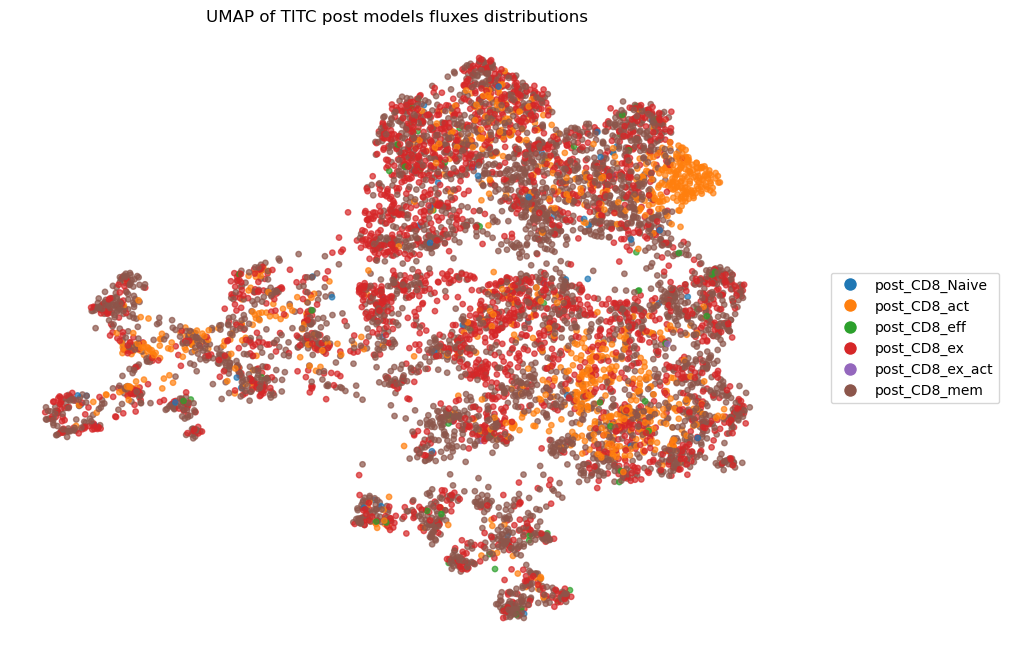

In [11]:
reducer = umap.UMAP(n_neighbors = 25, min_dist = 0.5, random_state = 42)
embedding = reducer.fit_transform(ft_fluxes_df)

plt.figure(figsize = (10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = colors, s = 15, alpha = .7) 
plt.legend(l, l_labs, bbox_to_anchor = (1.05, 0.5), loc = 'center left')
plt.title('UMAP of TITC post models fluxes distributions')
plt.axis('off') 
plt.savefig("umapf_post.svg")
plt.show()

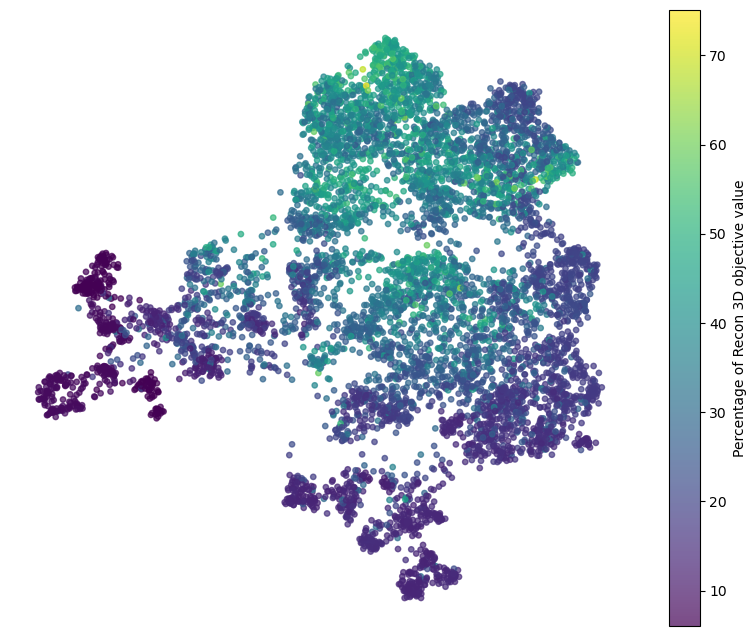

In [12]:
fd_ov = dict(zip(r_models.index, r_models['percent_ov']))

plt.figure(figsize = (10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = [fd_ov.get(index, -1) for index in t_fluxes_df.index], cmap = "viridis", s = 15, alpha = .7)
plt.colorbar(label = 'Percentage of Recon 3D objective value')  
plt.axis('off') 
plt.show()